In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install re

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
from itertools import combinations
from collections import Counter
import folium
from wordcloud import WordCloud
import seaborn as sns

In [5]:
# Step 1: Preprocessing
# Load the Dataset
input_file = "Dataset .csv"

In [6]:
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'\\u([0-9a-fA-F]{4})', lambda x: chr(int(x.group(1), 16)), text)
        text = re.sub(r'[^\x00-\x7F]+', '', text)  
        text = text.replace('\\', '').strip()
        return text
    return text

In [7]:
data = pd.read_csv(input_file)
data = data.applymap(clean_text)

In [8]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [9]:
# Step 2: Inspect data and handle missing values
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Swi

In [10]:
# Find and handle missing data
print("\nMissing Values Before Cleaning:")
print(data.isnull().sum())


Missing Values Before Cleaning:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [11]:
# Handle and Replace numeric missing values with mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())

In [12]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [13]:
data[col]

0        314
1        591
2        270
3        365
4        229
        ... 
9546     788
9547    1034
9548     661
9549     901
9550     591
Name: Votes, Length: 9551, dtype: int64

In [14]:
# Replace categorical missing values with 'Unknown'
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna('Unknown')

In [15]:
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())


Missing Values After Cleaning:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


# LEVEL 2 - Task1

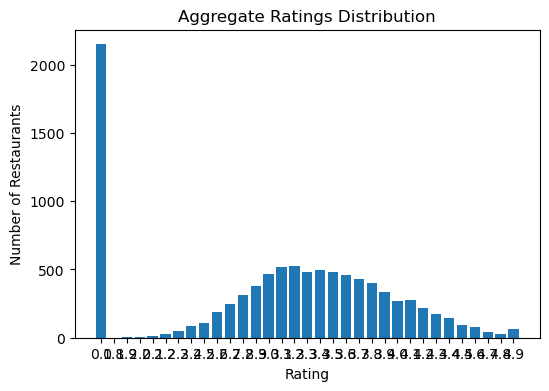


Aggregate Rating Analysis:
Most Common Rating Range: 0.0
Average Number of Votes per Restaurant: 156.909747670401


In [16]:
# Task: Aggregate Restaurant Rating
rating_counts = data['Aggregate rating'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(rating_counts.index.astype(str), rating_counts.values)
plt.title('Aggregate Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()
most_common_rating = rating_counts.idxmax()

average_votes = data['Votes'].mean()

print("\nAggregate Rating Analysis:")
print("Most Common Rating Range:", most_common_rating)
print("Average Number of Votes per Restaurant:", average_votes)


# LEVEL 2 - Task2

In [17]:
# Analyze Top Cuisines (3 cuisines)
cuisines = data['Cuisines'].dropna().str.split(', ').explode()
top_cuisines = cuisines.value_counts().head(3)
cuisines_percentage = (top_cuisines / len(data)) * 100

print("\nTop Cuisines Analysis:")
print(top_cuisines)
print("Percentage:\n", cuisines_percentage)


Top Cuisines Analysis:
North Indian    3960
Chinese         2735
Fast Food       1986
Name: Cuisines, dtype: int64
Percentage:
 North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: Cuisines, dtype: float64


In [18]:
# Task: Cuisine Combinations
if 'Cuisines' in data.columns and not data['Cuisines'].isnull().all():
    cuisines = data['Cuisines'].dropna()
    cuisines_combinations = cuisines.apply(
        lambda x: list(combinations(x.split(', '), 2)) if ', ' in x else []
    )
    combination_counts = Counter([combo for combos in cuisines_combinations for combo in combos])
    top_combinations = Counter(combination_counts).most_common(5)

    combination_ratings = {}
    for combo, _ in top_combinations:
        combo_filter = data['Cuisines'].notna() & data['Cuisines'].str.contains(combo[0]) & data['Cuisines'].str.contains(combo[1])
        filtered_data = data[combo_filter]
        combination_ratings[combo] = filtered_data['Aggregate rating'].mean() if not filtered_data.empty else None
    print("\nMost Common Cuisine Combinations:")
    for combo, count in top_combinations:
        print(f"{combo}: {count} times")

    print("\nAverage Ratings for Common Cuisine Combinations:")
    for combo, rating in combination_ratings.items():
        print(f"{combo}: {rating:.2f}" if rating is not None else f"{combo}: No ratings available")
else:
    print("The 'Cuisines' column is missing or contains no valid data.")



Most Common Cuisine Combinations:
('North Indian', 'Chinese'): 1516 times
('North Indian', 'Mughlai'): 728 times
('North Indian', 'Fast Food'): 377 times
('Chinese', 'Fast Food'): 331 times
('North Indian', 'South Indian'): 314 times

Average Ratings for Common Cuisine Combinations:
('North Indian', 'Chinese'): 2.70
('North Indian', 'Mughlai'): 2.77
('North Indian', 'Fast Food'): 2.70
('Chinese', 'Fast Food'): 2.58
('North Indian', 'South Indian'): 2.55


# LEVEL 2 - Task3

In [19]:
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans

# Task: Geographic Map of Restaurants (Optimized)
restaurant_map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(restaurant_map)

for _, row in data.iterrows():
    if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude']):
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(marker_cluster)

print("Restaurant Locations Map:")
restaurant_map  

coordinates = data[['Latitude', 'Longitude']].dropna()
kmeans = KMeans(n_clusters=5, random_state=42).fit(coordinates)
data['Cluster'] = kmeans.labels_

cluster_map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)
colors = ['red', 'blue', 'green', 'purple', 'orange']

for cluster in range(5): 
    cluster_data = coordinates[data['Cluster'] == cluster]
    cluster_center = kmeans.cluster_centers_[cluster]
    folium.CircleMarker(
        location=cluster_center,
        radius=15,
        color=colors[cluster],
        fill=True,
        fill_opacity=0.6,
        popup=f"Cluster {cluster}"
    ).add_to(cluster_map)

print("Cluster Map:")
cluster_map  

Restaurant Locations Map:


C:\Users\model\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Map:


# LEVEL 2 - Task4

In [20]:
# Task: Restaurant Chains Analysis

chain_counts = data['Restaurant Name'].value_counts()
chains = chain_counts[chain_counts > 1]  

chain_analysis = data[data['Restaurant Name'].isin(chains.index)].groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',  
    'Votes': 'sum'            
}).sort_values(by='Votes', ascending=False)

print("\nRestaurant Chain Analysis:")
print("Number of Restaurant Chains Identified:", len(chains))
print("\nTop Restaurant Chains by Popularity:")
print(chain_analysis.head())


Restaurant Chain Analysis:
Number of Restaurant Chains Identified: 734

Top Restaurant Chains by Popularity:
                           Aggregate rating  Votes
Restaurant Name                                   
Barbeque Nation                    4.353846  28142
AB's - Absolute Barbecues          4.825000  13400
Big Chill                          4.475000  10853
Farzi Cafe                         4.366667  10098
Truffles                           3.950000   9682
